<a href="https://colab.research.google.com/github/Tefong35/streamlit-example/blob/master/PredictingNEXTNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#drive.mount("/gdrive", force_remount=True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from datetime import datetime, date
import seaborn as sns
#import random
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
#import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical


Next Number Prediction

In [254]:
# Daten einlesen
data = pd.read_excel("/content/drive/MyDrive/Testbeispiel.xlsx", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3,13,14,15,16,25,26,32,39,42,45,47,53,54,60,62,64,66,67,70
1,2,6,11,16,20,23,27,29,35,38,41,46,47,48,51,55,57,58,65,69
2,2,7,8,9,14,15,18,22,29,36,37,50,51,54,59,60,61,62,64,70
3,4,6,9,12,15,20,21,24,28,29,32,33,37,44,50,51,52,55,61,67
4,5,6,7,15,29,37,39,42,44,45,48,49,50,52,54,57,58,60,61,66


In [3]:
print(data)

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    3  13  14  15  16  25  26  32  39  42  45  47  53  54  60  62  64  66   
1    2   6  11  16  20  23  27  29  35  38  41  46  47  48  51  55  57  58   
2    2   7   8   9  14  15  18  22  29  36  37  50  51  54  59  60  61  62   
3    4   6   9  12  15  20  21  24  28  29  32  33  37  44  50  51  52  55   
4    5   6   7  15  29  37  39  42  44  45  48  49  50  52  54  57  58  60   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
58   4   7  12  14  18  23  24  29  33  34  42  45  49  51  52  55  59  62   
59   1   6   7  11  18  20  22  35  37  39  40  41  43  52  53  55  56  57   
60   3   4   9  13  17  26  30  31  35  37  39  42  43  48  59  61  65  67   
61   6   9  12  13  14  19  20  30  31  36  39  44  45  46  47  53  56  59   
62   2   3   4  11  12  16  28  29  31  33  35  39  41  48  52  55  56  58   

    18  19  
0   67  70  
1   65  69  
2   64  70  
3   61  67 

In [255]:
dataset = data.values
dataset

array([[ 3, 13, 14, ..., 66, 67, 70],
       [ 2,  6, 11, ..., 58, 65, 69],
       [ 2,  7,  8, ..., 62, 64, 70],
       ...,
       [ 3,  4,  9, ..., 67, 69, 70],
       [ 6,  9, 12, ..., 59, 66, 70],
       [ 2,  3,  4, ..., 58, 61, 63]])

In [256]:
# split labels and datas
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)):
        rowX = dataset[i, 0:-1].astype('float32')/max_num_X # Normalized X
        dataX.append(rowX)
        dataY.append(dataset[i, -1])
        X = np.array(dataX)
        y = np.array(dataY)
    return X, y

In [257]:
max_num_X = np.amax(dataset[:, 0:-1])
max_num_Y = np.amax(dataset[:, -1])
X, y = create_dataset(dataset)

In [258]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [259]:
# reshape trainX and testX to be [samples, time steps, features]
samples_train = len(X_train)
samples_test = len(X_test)
time_steps = len(X_train[1])
trainX_input = np.reshape(X_train, (samples_train, time_steps, 1))
testX_input = np.reshape(X_test, (samples_test, time_steps, 1))

In [260]:
# one hot encode the output variable
output_size =  max_num_Y + 1
trainY_cat = to_categorical(y_train, num_classes = output_size) # output number range 0-max_num_Y+1
testY_cat = to_categorical(y_test, num_classes = output_size)

In [303]:
tf.keras.backend.clear_session()

In [304]:
# create the model
input_dimension = 1
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, input_dimension))) # , recurrent_dropout=0.2, dropout=0.2 Use recurrent_dropout to apply dropout to the recurrent connections
model.add(Dense(output_size, activation='softmax')) # , kernel_regularizer='l2' Use kernel_regularizer for L2 regularization


In [291]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 71)                3621      
                                                                 
Total params: 14021 (54.77 KB)
Trainable params: 14021 (54.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


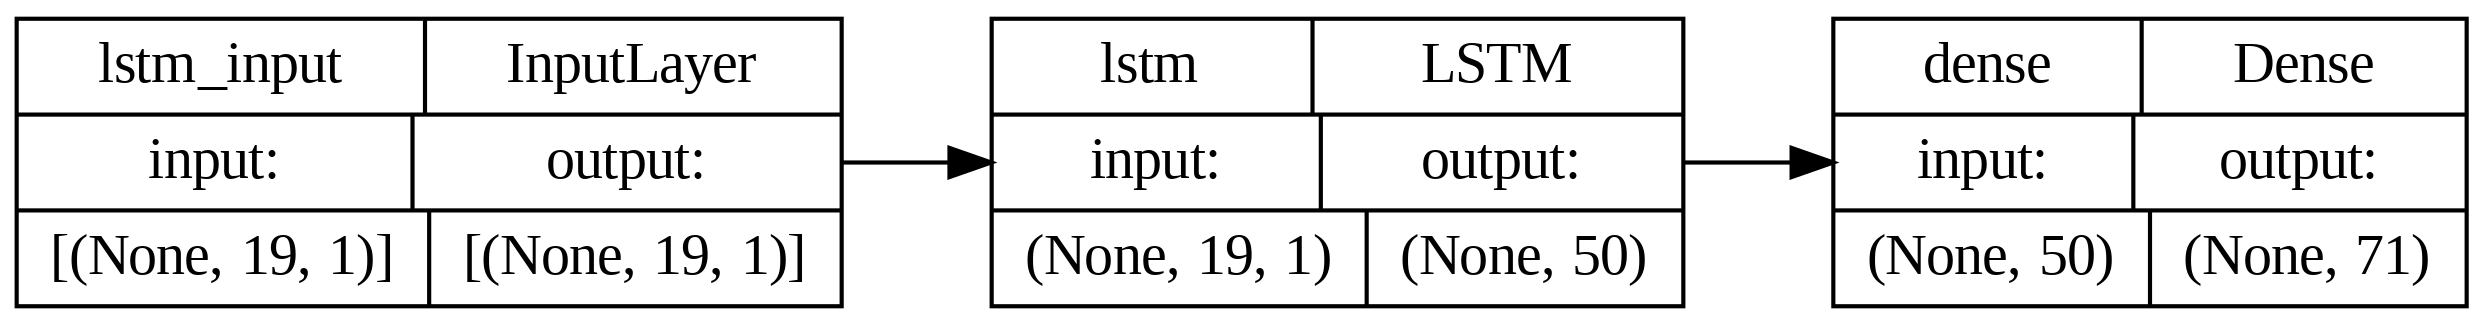

In [298]:
#plot model
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='LR', expand_nested=True, dpi=300,
)

In [305]:
#compile the model
model.compile(loss='mean_squared_error', optimizer= "adam", metrics=['accuracy'])
print('Toy LSTM model created...')

Toy LSTM model created...


In [306]:
from keras.callbacks import EarlyStopping
# training
print('Training...')
early_stopping = EarlyStopping(monitor='val_loss', patience=5000)
history = model.fit(trainX_input, trainY_cat, epochs=1000, batch_size = 1, verbose=2, validation_split=0.2, callbacks=[early_stopping])

Training...
Epoch 1/1000
40/40 - 4s - loss: 0.0138 - accuracy: 0.1750 - val_loss: 0.0136 - val_accuracy: 0.5000 - 4s/epoch - 111ms/step
Epoch 2/1000
40/40 - 1s - loss: 0.0127 - accuracy: 0.2500 - val_loss: 0.0109 - val_accuracy: 0.5000 - 510ms/epoch - 13ms/step
Epoch 3/1000
40/40 - 0s - loss: 0.0120 - accuracy: 0.2500 - val_loss: 0.0113 - val_accuracy: 0.5000 - 438ms/epoch - 11ms/step
Epoch 4/1000
40/40 - 1s - loss: 0.0118 - accuracy: 0.2250 - val_loss: 0.0116 - val_accuracy: 0.1000 - 683ms/epoch - 17ms/step
Epoch 5/1000
40/40 - 1s - loss: 0.0117 - accuracy: 0.2000 - val_loss: 0.0114 - val_accuracy: 0.1000 - 651ms/epoch - 16ms/step
Epoch 6/1000
40/40 - 1s - loss: 0.0118 - accuracy: 0.1500 - val_loss: 0.0113 - val_accuracy: 0.5000 - 655ms/epoch - 16ms/step
Epoch 7/1000
40/40 - 1s - loss: 0.0117 - accuracy: 0.2000 - val_loss: 0.0112 - val_accuracy: 0.5000 - 671ms/epoch - 17ms/step
Epoch 8/1000
40/40 - 1s - loss: 0.0117 - accuracy: 0.2000 - val_loss: 0.0112 - val_accuracy: 0.5000 - 851ms/

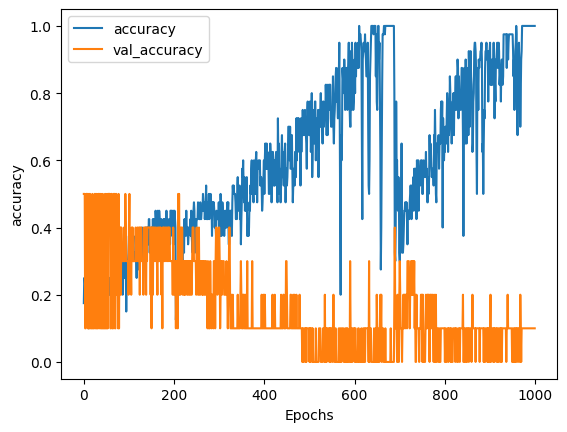

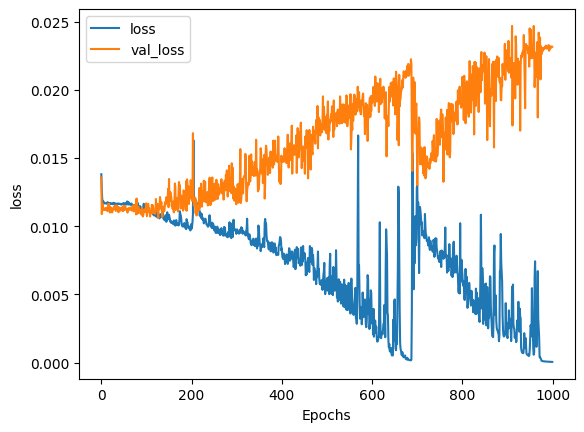

In [307]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

In [308]:
# testing
print('Testing on test data...')
scores = model.evaluate(testX_input, testY_cat, verbose=2)
print('Test accuracy on test data: {}'.format(scores[1]))

Testing on test data...
1/1 - 0s - loss: 0.0158 - accuracy: 0.3077 - 480ms/epoch - 480ms/step
Test accuracy on test data: 0.3076923191547394


In [309]:
print('Testing on training data...')
scores = model.evaluate(trainX_input, trainY_cat, verbose=2)
print('Test accuracy on training data: {}'.format(scores[1]))

Testing on training data...
2/2 - 0s - loss: 0.0047 - accuracy: 0.8200 - 29ms/epoch - 14ms/step
Test accuracy on training data: 0.8199999928474426


In [310]:
# Prediction
print('Predicting on testing data...')
for row in X_test:
    x = np.reshape(row, (1, len(row), 1))
    prediction = model.predict(x, verbose=0)
    y_hat = np.argmax(prediction)
    # Check if max_num_X is not None before using it
    if max_num_X is not None:
        print((row * max_num_X).astype("int"), "-->", y_hat)
    else:
        print("Warning: max_num_X is None. Cannot convert to integer.")
        print(row, "-->", y_hat)

Predicting on testing data...
[ 2  5  9 14 16 22 25 33 35 42 44 47 48 49 52 54 57 59 63] --> 69
[ 7 13 17 21 31 33 39 40 42 44 45 46 49 51 56 59 66 67 69] --> 69
[ 6 22 24 25 26 27 28 32 33 34 36 37 39 42 47 51 53 64 66] --> 68
[ 3 13 14 14 16 25 26 32 39 42 45 47 53 54 59 62 64 66 67] --> 69
[ 2 10 17 19 20 21 23 31 33 34 35 36 40 41 47 52 59 63 66] --> 70
[ 1  3 10 14 14 19 22 28 33 34 35 37 42 42 46 48 49 50 59] --> 66
[ 3  8 10 18 20 21 22 24 26 28 31 35 42 44 45 49 50 54 55] --> 70
[ 3  6 10 26 31 32 33 34 36 38 41 42 42 44 46 47 55 56 59] --> 67
[ 1  2  7  9 14 18 27 29 31 35 36 38 48 50 51 58 59 63 65] --> 66
[ 1  3 13 18 21 22 28 29 34 41 42 45 46 49 53 59 61 66 69] --> 70
[ 1  4  9 13 16 17 18 19 22 23 24 27 28 29 32 35 44 46 50] --> 70
[ 3 13 14 17 21 23 24 29 35 36 37 46 49 54 57 59 63 65 67] --> 69
[ 1 14 19 22 25 28 32 35 42 44 49 52 55 57 58 61 63 67 68] --> 69


In [311]:
# Prediction
print('Predicting on training data...')
for row in X_train:
    x = np.reshape(row, (1, len(row), 1))
    prediction = model.predict(x, verbose=0)
    y_hat = np.argmax(prediction)
    # Check if max_num_X is not None before using it
    if max_num_X is not None:
        print((row * max_num_X).astype("int"), "-->", y_hat)
    else:
        print("Warning: max_num_X is None. Cannot convert to integer.")
        print(row, "-->", y_hat)

Predicting on training data...
[ 3  4  9 13 17 26 29 31 35 37 39 42 42 48 59 61 65 67 69] --> 70
[ 1  8 10 19 25 28 29 31 33 36 39 44 45 49 50 56 62 64 65] --> 67
[ 2  4  6 19 20 22 23 24 29 41 42 44 48 51 53 61 63 64 66] --> 68
[ 3  6 14 18 20 21 25 27 29 31 35 40 41 45 47 48 54 57 65] --> 70
[ 5  6  7  8  9 11 12 16 18 19 22 23 26 31 36 45 50 58 59] --> 61
[ 2 14 17 23 25 26 29 41 42 45 47 48 49 56 57 63 65 66 68] --> 69
[ 2  3  6  8 17 19 21 22 28 29 31 34 37 45 52 55 56 57 58] --> 67
[ 1  2  4  8 14 22 28 31 33 42 44 46 47 55 59 61 62 63 67] --> 68
[ 6  7  8 10 11 12 16 17 18 19 22 24 33 34 49 59 59 62 64] --> 67
[ 4  6  9 10 17 23 25 31 40 41 46 48 49 54 56 57 58 64 66] --> 69
[ 1  4 14 17 18 20 26 28 33 35 36 42 50 56 59 59 64 65 68] --> 70
[ 3  9 12 13 16 24 26 27 31 32 34 39 44 46 53 54 55 56 62] --> 67
[ 3  5 11 12 14 18 22 23 32 33 40 41 42 50 56 58 59 59 64] --> 66
[ 1  2  5 13 14 14 16 17 19 20 22 29 36 42 49 50 61 65 68] --> 70
[ 2  7  8  9 14 14 18 22 29 36 37 50 51 54 59